In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [3]:
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE)
rng = np.random.default_rng(seed = RANDOM_STATE) # Set Random Seed for reproducible  results

NOISE = 0.2
EPOCHS = 200 # number of epochs
ALPHA = 0.1  # learning rate
N_SAMPLES = 1000
TEST_SIZE=0.2

# parameters for Matplotlib
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 8),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'
         }
plt.rcParams.update(params)

CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid')

In [4]:
X, y = datasets.make_moons(n_samples=N_SAMPLES, 
                           shuffle=True, 
                           noise=NOISE, 
                           random_state=RANDOM_STATE)
X[:5], y[:5]

(array([[ 0.90633951,  0.90267624],
        [-1.11536828,  0.75579289],
        [ 1.88769158,  0.4175967 ],
        [-0.93345034, -0.02299851],
        [-0.96872877,  0.06396285]]),
 array([0, 0, 1, 0, 0], dtype=int64))

In [5]:
# visualization
data_df = pd.DataFrame(X, columns = ['A', 'B'])

data_df['target'] = y

data_df.head()


,A,B,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0


In [6]:
data_df.target.unique()

array([0, 1], dtype=int64)

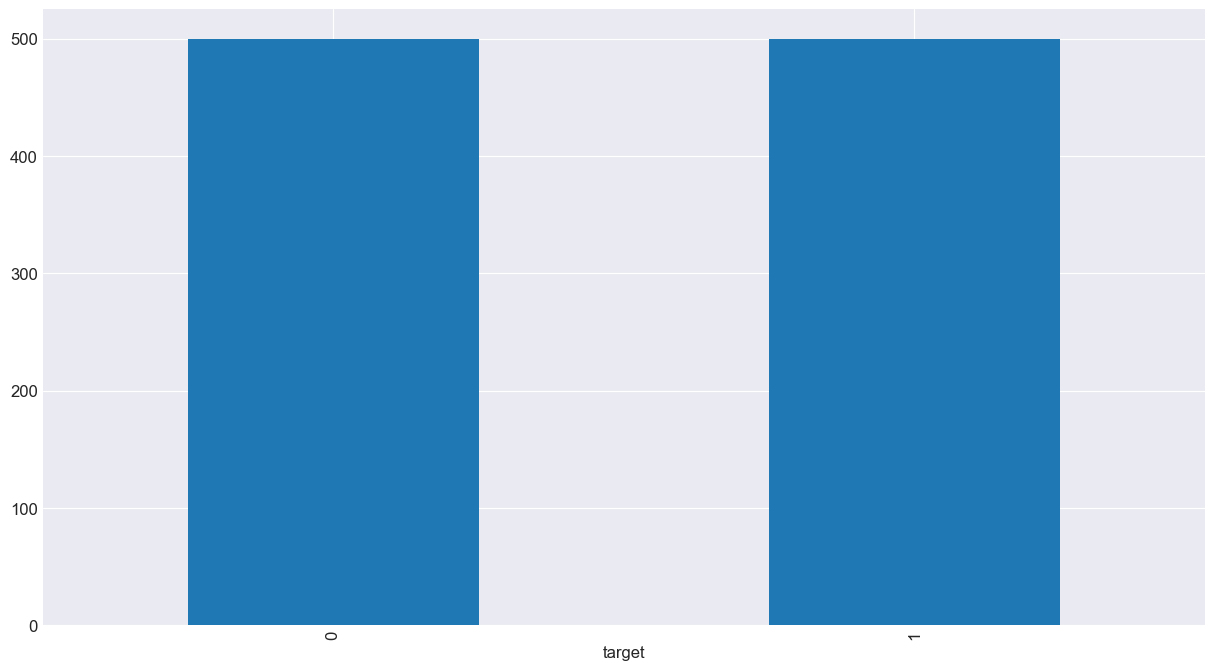

In [7]:
fig, ax = plt.subplots() # Instantiate
    
data_df['target'].value_counts().plot(ax=ax, kind='bar');

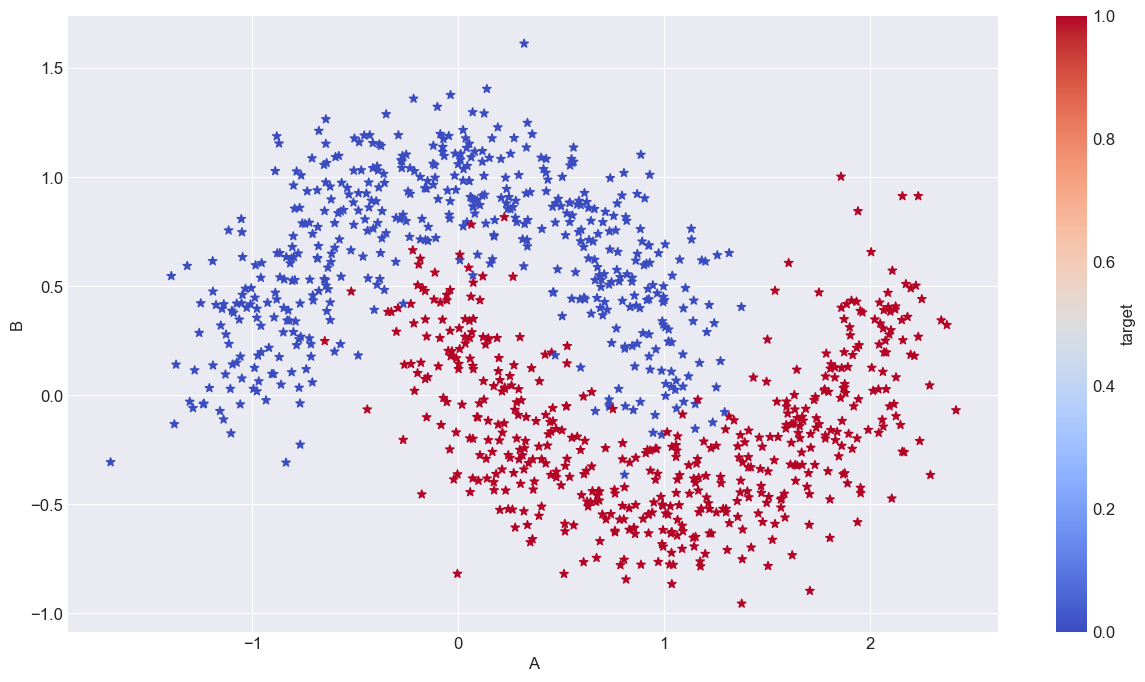

In [8]:
# Plot the data
data_df.plot.scatter('A', 'B',      # columns to plot
                     s = 40,        # size of the marker
                     marker = '*',  # type of marker
                     c = 'target',  # color as per target column
                     cmap=CMAP);    # using colormap

In [9]:
data_df.describe()

,A,B,target
count,1000.000000,1000.000000,1000.00000
mean,0.490841,0.239025,0.50000
std,0.898951,0.540082,0.50025
min,-1.688795,-0.955280,0.00000
25%,-0.149565,-0.205090,0.00000
50%,0.500100,0.241163,0.50000
75%,1.095048,0.680394,1.00000
max,2.419113,1.612075,1.00000


In [10]:
X_train, X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=TEST_SIZE,
                                                 stratify=y,
                                                 random_state=RANDOM_STATE)

In [11]:
data_train, data_test=data_df.to_numpy()[:900], data_df.to_numpy()[900:]

In [12]:
data_test.shape

(100, 3)

In [13]:
data_train.shape

(900, 3)

In [14]:
type(data_train)

numpy.ndarray

In [15]:
def predict(row, weights):
    z = weights[0]
    
    for i in range (len(row)-1):
        z += weights[i+1] * row[i] #  z = W*X + b 
    a = 1/(1+np.exp(-z))
        
    return a

In [16]:
wgts= np.array([0.1,2,1])

predict(data_train[0], wgts)

0.9434999754763397

In [17]:
def train_weights(train, n_epochs, alpha):
    errors = []
    weights = rng.random(train.shape[1]) # Weights at random
    m = train.shape[0] # number of rows in the training data
    for epoch in range(n_epochs):
        sum_error = 0.0
        for row in train:
            prediction = predict(row, weights)
            dz = prediction - row[-1]
            #sum_error += (prediction -row[-1])**2
            sum_error += - row[-1]*np.log(prediction)
            weights[0] =  weights[0] - alpha * dz / m
            for i in range(len(row)-1):
                weights[i+1] = weights[i+1] - alpha * dz * row[i]/m
        errors.append(sum_error/m)
    return errors, weights

In [18]:
errors, weights = train_weights(data_train, EPOCHS, ALPHA)

In [19]:
def fn_sigmoid(z:np.ndarray)->np.ndarray:
    return 1/(1+np.exp(-z))

In [20]:
weights

array([-0.21836727,  1.21131005, -1.68584107])

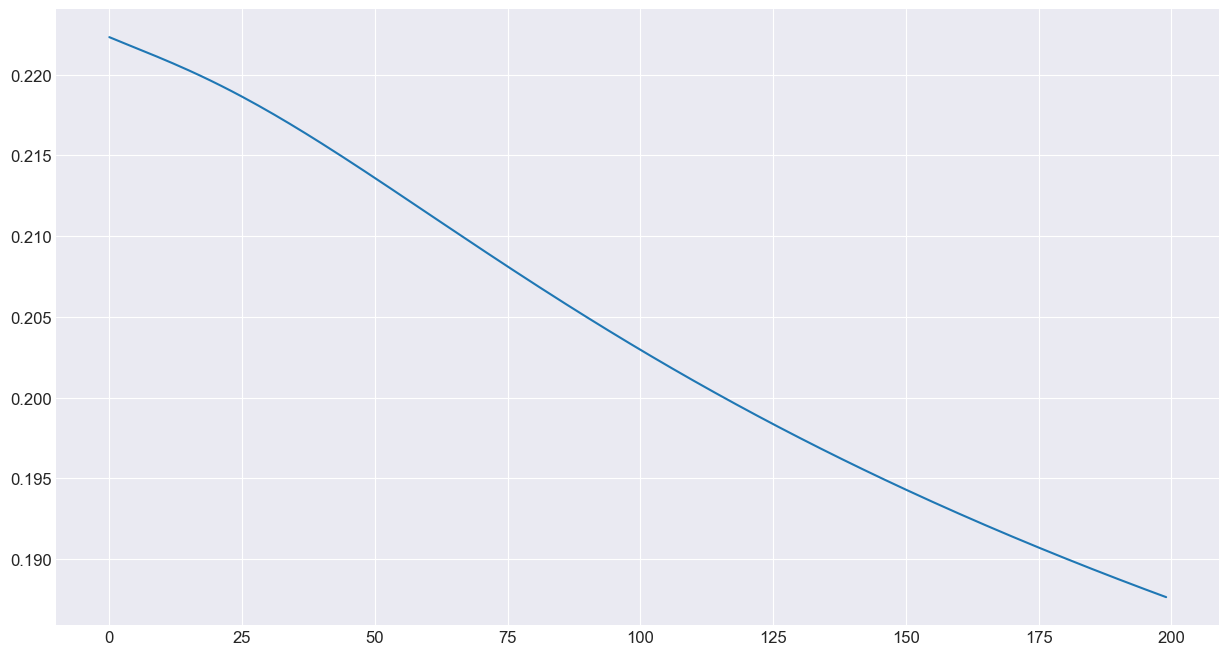

In [21]:
ax = plt.plot(errors)

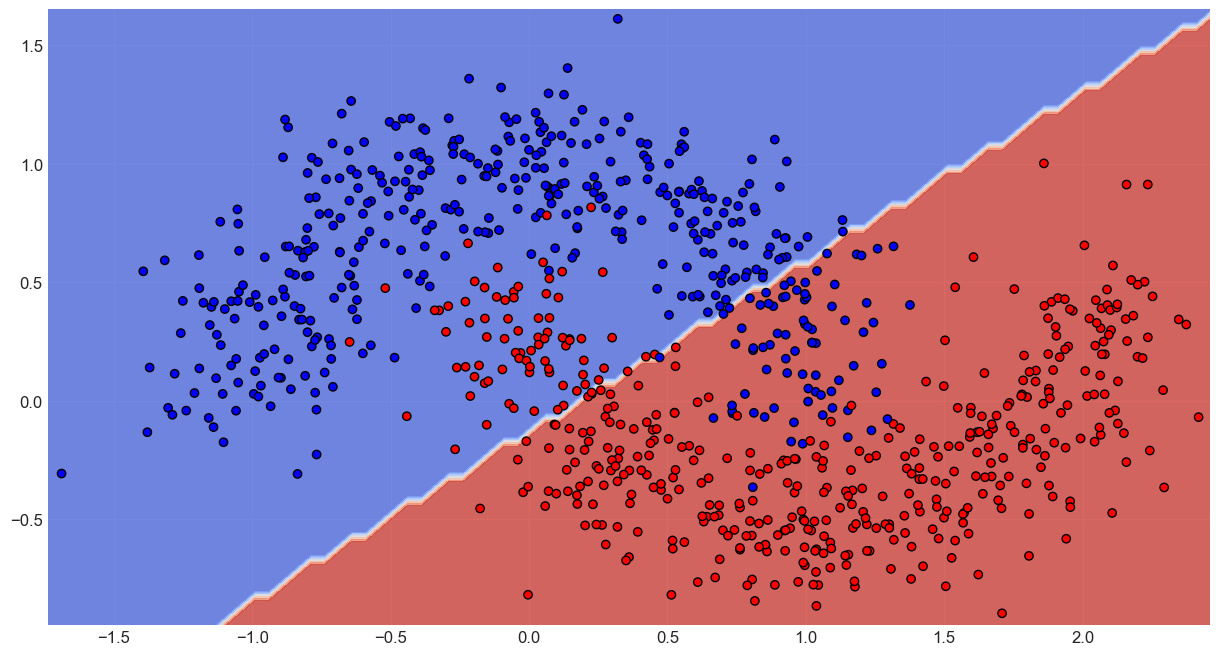

In [22]:
X = data_train
fig, ax = plt.subplots() # instantiation of plt objects
dm = 0.05 # spacing of the grid
x_min, x_max = X[:, 0].min() - 0.05 ,X[:, 0].max() + 0.05
y_min, y_max = X[:, 1].min() - 0.05 ,X[:, 1].max() + 0.05
xx,yy = np.meshgrid(np.arange(x_min, x_max, dm), 
                    np.arange(y_min, y_max, dm)) # generate a mesh
XX = np.c_[xx.ravel(), yy.ravel()] # prepare feature data
XX = np.hstack((XX, np.ones((XX.shape[0], 1)))) 
y_pred = []
for row in XX:
    pred = predict(row, weights)
    y_p = 1 if pred >= 0.5 else 0
    y_pred.append(y_p)
Z = np.array(y_pred).reshape(xx.shape)
ax.contourf(xx,yy, Z, cmap=CMAP, alpha = 0.8)
ax.scatter(X[:, 0], X[:, 1], c = X[:,2], 
           edgecolors='k', 
           cmap = plt.cm.bwr)

In [23]:
predictions = []

for row in data_train:

    pred = predict(row, weights)
    y_p = 1 if pred >= 0.5 else 0
    predictions.append(y_p)

accuracy_score(data_train[:, -1], predictions)

0.8288888888888889

In [24]:
predictions = []

for row in data_test:

    pred = predict(row, weights)
    
    y_p = 1 if pred >= 0.5 else 0
    predictions.append(y_p)

accuracy_score(data_test[:, -1], predictions)

0.89

In [25]:
cm = confusion_matrix(data_test[:, -1], predictions)
cm

array([[54,  4],
       [ 7, 35]], dtype=int64)

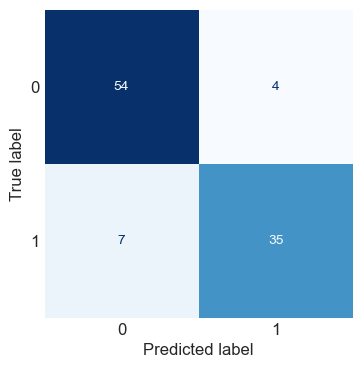

In [26]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[0,1])

fig, ax = plt.subplots(figsize=(4,4))

disp.plot(ax = ax, cmap='Blues', colorbar=False);
ax.grid(False);

In [27]:
sm=fn_sigmoid(np.asarray([[-1,0,1],[-np.inf,0,np.inf]]))
sm

array([[0.26894142, 0.5       , 0.73105858],
       [0.        , 0.5       , 1.        ]])

In [28]:
def fn_activ(z):
    return np.tanh(z)
def fn_activ_prime(z):
    return 1. - np.tanh(a)**2

In [29]:
def predict(model,X_p):
        W1,b1,W2,b2=model['W1'],model['b1'],model['W2'],model['b2']
        # Layer 1-->

        z1=X_p.dot(W1)+b1 #aggregation
        a1=fn_activ(z1) #activation function

        # Layer 2 -->

        z2 = a1.dot(W2) +b2 #aggregation
        a2=fn_sigmoid(z2) #activation

        return a2>=0.5 #is it greater or equal to 0.5

In [30]:
def calculate_loss(model,X_l, y_l):
        W1,b1,W2,b2=model['W1'],model['b1'],model['W2'],model['b2']
        # Layer 1-->
        
        m=X_l.shape[0]

        z1=X_l.dot(W1)+b1 #aggregation
        a1=fn_activ(z1) #activation function

        # Layer 2 -->

        z2 = a1.dot(W2) +b2 #aggregation
        a2=fn_sigmoid(z2) #activation

        data_loss=-(y_l*np.log(a2)).sum() #Binary

        return data_loss

In [31]:
def build_model(X_tr, y_tr,nn_out,nn_hdim, epochs=EPOCHS, alpha=ALPHA):
    m, nn_input_dim=X_tr.shape

    '''
    Args:
        X_tr: Training Features
        y_tr: Training Labels
        nn_hdim: nnumber of nodes in the hidden layer
        nn_out: size of output
    '''
    nn_output_dim=nn_out

    W1=rng((nn_input_dim,nn_hdim), dtype=np.float32) /np.sqrt(nn_input_dim)
    W2=rng((nn_output_dim,nn_hdim), dtype=np.float32) /np.sqrt(nn_hdim)

    b1=np.zeros((1, nn_hdim), dtype=np.float32)
    b2=np.zeros((1, nn_output_dim), dtype=np.float32)

    curr_loss=0
    loss , epoch=[],[]

    for i in range(0, epochs):

        ## FORWARD PROPAGATION

        # Layer 1-->

        z1=X_tr.dot(W1)+b1
        a1=fn_activ(z1) #activation function

        # Layer 2 -->

        z2 = a1.dot(W2) +b2
        a2=fn_sigmoid(z2)

        ## BACK PROPAGATION

        assert(a2.shape == y_tr.shape), f'check y {a2.shape}/{y_tr.shape}'
        dz2 = a2 -y_tr # remember dim of a1 and y to be same

        dW2 = (a1.T).dot(dz2)
        assert(W2.shape == dW2.shape), f'check y {W2.shape}/{dW2.shape}'
        
        db2=np.sum(dz2, axis=0, keepdims=True)
        assert(b2.shape == db2.shape), f'check y {b2.shape}/{db2.shape}'
        
        da1=dz2.dot(W2.T)
        assert(a1.shape == da1.shape), f'check y {a1.shape}/{da1.shape}'
        
        # Layer 1
        dz1=da1*fn_activ_prime(z1)
        assert(z1.shape == dz1.shape), f'check y {z1.shape}/{dz1.shape}'

        dW1 = (a1.T).dot(dz1)
        assert(W1.shape == dW1.shape), f'check y {W1.shape}/{dW1.shape}'
        
        db1=np.sum(dz1, axis=0, keepdims=True)
        assert(b1.shape == db1.shape), f'check y {b1.shape}/{db1.shape}'        

        ## Gradient Update

        W1 += -alpha * dW1 /m
        b1 += -alpha * db1 /m
        
        W2 += -alpha * dW2 /m
        b2 += -alpha * db2 /m

        model={
            'W1': W1, 'b1': b1,

            'W2': W2, 'b2': b2,
        }
    return model

In [32]:
nn_out_dim=1
errors, weights = build_model(data_train, EPOCHS, ALPHA)

TypeError: build_model() missing 1 required positional argument: 'nn_hdim'

In [33]:
weights

array([-0.21836727,  1.21131005, -1.68584107])

In [34]:
errors

[0.2223254058567471,
 0.22218881186839226,
 0.22205384993674737,
 0.22192000129820763,
 0.2217867866492394,
 0.22165376514111354,
 0.2215205332552538,
 0.2213867235736588,
 0.22125200345913507,
 0.22111607366010474,
 0.2209786668545263,
 0.22083954614708434,
 0.22069850353318826,
 0.22055535834262002,
 0.2204099556748042,
 0.22026216483676356,
 0.22011187779382868,
 0.2199590076421491,
 0.2198034871110204,
 0.21964526710201795,
 0.2194843152709157,
 0.21932061465741057,
 0.2191541623667481,
 0.21898496830648034,
 0.21881305398078782,
 0.21863845134406626,
 0.21846120171479586,
 0.21828135475013594,
 0.21809896748113183,
 0.2179141034079767,
 0.2177268316543526,
 0.21753722617955124,
 0.21734536504677174,
 0.21715132974576798,
 0.21695520456783435,
 0.21675707603096958,
 0.2165570323529511,
 0.21635516296999557,
 0.21615155809862288,
 0.215946308338342,
 0.2157395043127803,
 0.21553123634690147,
 0.21532159417801008,
 0.21511066669829723,
 0.2148985417267426,
 0.21468530580827264,
 0.21

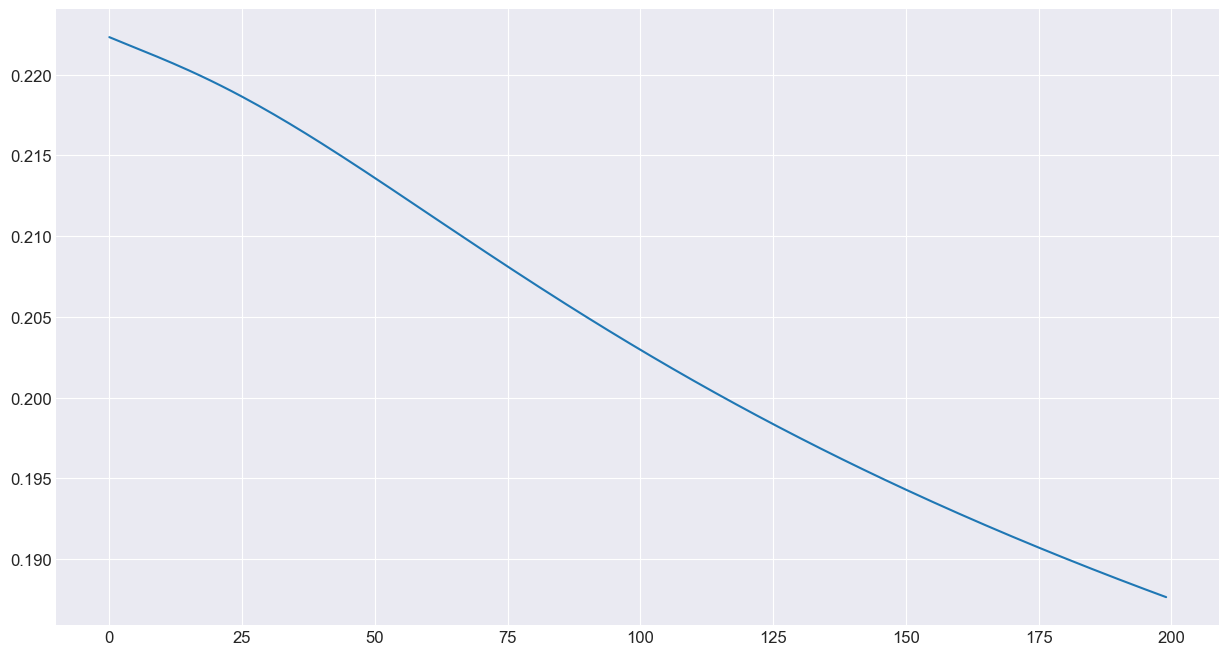

In [35]:
ax=plt.plot(errors)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

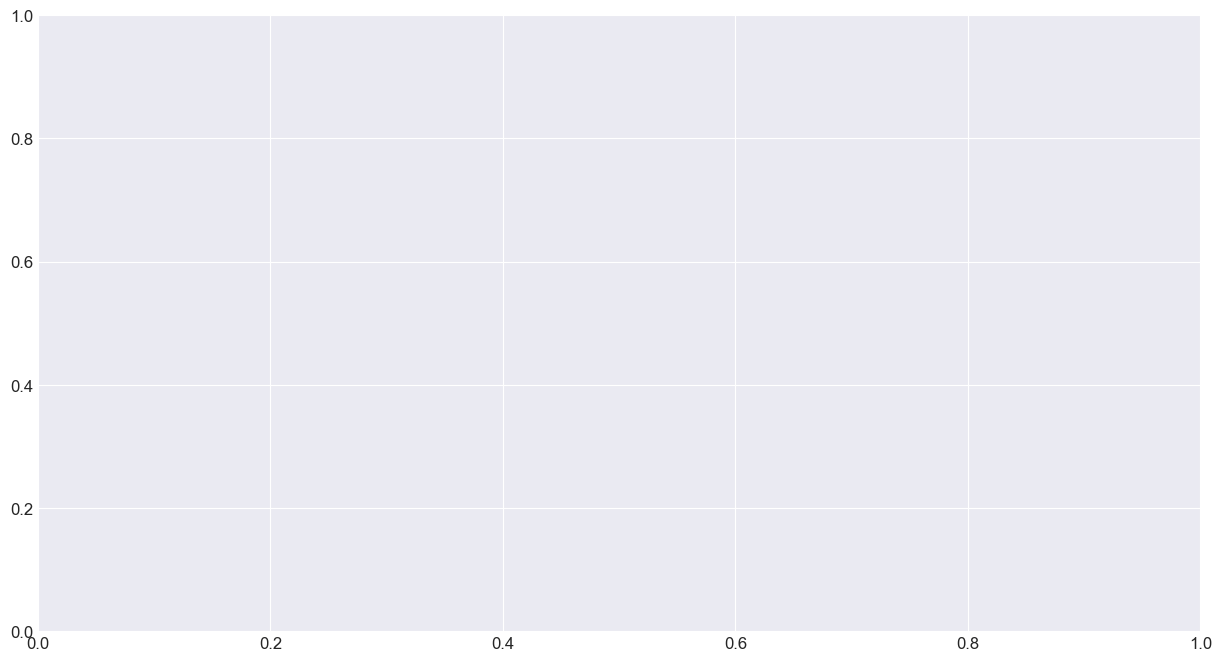

In [36]:
X=data_train
fig,ax=plt.subplots()
dm=0.05
x_min,x_max=X[:,0].min()-0.05,X[:,0].max()+0.05
y_min,y_max=X[:,1].min()-0.05,X[:,1].max()+0.05
xx,yy=np.meshgrid(np.arange(x_min,x_max,dm),np.arange(y_min,y_max,dm))

XX=np.c_[xx.ravel(),yy.ravel()]
XX=np.hstack((XX,np.ones((XX.shape[0],1))))
y_pred=[]
for row in XX:
    pred=predict(row,weights)        
    y_pred.append(np.round(pred))
Z=np.array(y_pred).reshape(xx.shape)
ax.contourf(xx,yy,Z,cmap=CMAP,alpha=0.8)
ax.scatter(X[:,0],X[:,1],c=X[:,2],edgecolors="k",cmap=plt.cm.bwr)

In [37]:
xx.shape

(53, 85)

In [38]:
yy.shape

(53, 85)

In [39]:
##train data
predictions=[]
for row in data_train:
    pred=predict(row,weights)
    predictions.append(np.round(pred))
accuracy_score(data_train[:,-1],predictions)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [40]:
predictions=[]
for row in data_test:
    pred=predict(row,weights)
    predictions.append(np.round(pred))
accuracy_score(data_test[:,-1],predictions)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [42]:
cm=confusion_matrix(data_test[:,-1],predictions)
cm

ValueError: Found input variables with inconsistent numbers of samples: [100, 0]

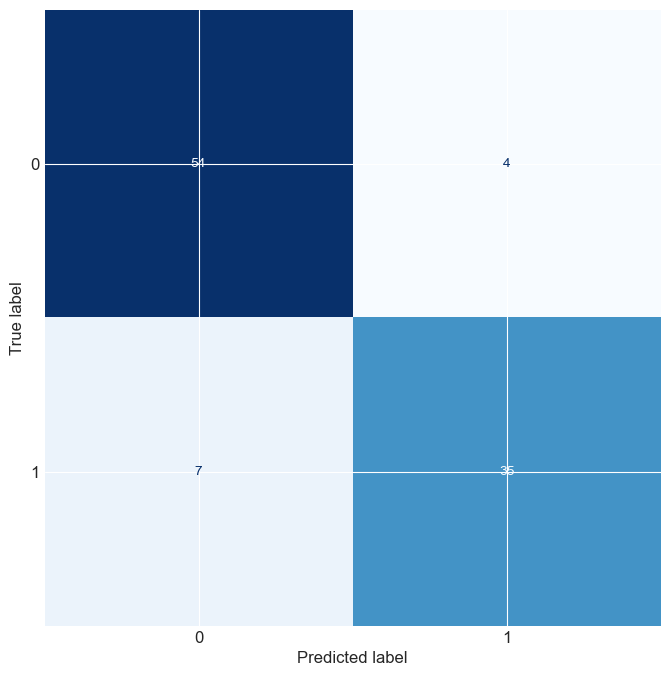

In [43]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
disp.plot(cmap="Blues",colorbar=False)

In [44]:
def predict (model, X_p):
    W1 = model['W1'],model['b1'],model['W2'],model['b2']
    
    ##Forward Propagation
    #Layer 1
    z1 = X_p.dot(W1) + b1  ##Aggregation
    a1 = fn_activ(z1)      ##Activation
    
    ##Layer 2
    z2 = a1.dot(W2) + b2  ##Aggregation
    a2 = fn_sigmoid(z2)    ##Activation
    return a2>=0.5        ##It is greater than or equal to 0.5

In [45]:
def calculate_loss(model, X_l,y_l):
    W1, b1, W2, b2 = model['W1'],model['b1'],model['W2'],model['b2']
    
    m = X_l.shape[0]
    ##Forward Propagation
    #Layer 1
    z1 = X_p.dot(W1) + b1  ##Aggregation
    a1 = fn_activ(z1)      ##Activation
    
    ##Layer 2
    z2 = a1.dot(W2) + b2  ##Aggregation
    a2 = fn_sigmoid(z2)    ##Activation
    return a2>=0.5  

    data_loss = -(y_l*np.log(a2)).sum()  ##Binary
    
    return data_loss / m

In [46]:
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [47]:
def build_model(X_tr,y_tr,nn_hdim,nn_out,alpha=ALPHA,epochs = EPOCHS):
#Args:
#X_tr: Training features
#y_tr: Training Labels
#nn_hdim: number of nodes in the hidden layer
#nn_out: size of output
    
    m, nn_input_dim = X_tr.shape
    nn_output_dim = nn_out
    
    W1 =rng((nn_input_dim,nn_hdim), 
            dtype = np.float32) / np.sqrt(nn_input_dim)
    W2 =rng((nn_hdim,nn_output_dim), 
            dtype = np.float32) / np.sqrt(nn_hdim)
    b1 = np.zeros((1,nn_hdim),dtype  = np.float32)
    b2 = np.zeros((1,nn_output_dim), dtype = np.float32)
    
    curr_loss = 0
    loss, epoch = [], []
    
    for i in range (0, epochs):
        ###Forward Propagation
        ##Layer1
        z1 = X_tr.dot(W1) + b1
        a1 = fn_activ(z1)

        ##Layer2
        z2 = a1.dot(W2) + b
        a2 = fn_sigmoid(z)
    
        ##Back Propagation
        assert(a2.shape == y_tr.shape), f'check y {a2.shape}/{y_tr.shape}'
        dz2 = a2 - y_tr ###Remember sim of a2 and y to be same
        dW2 = (a1.T).dot(dz2)
        assert(W2.shape == dW2.shape), f'check W2 {a2.shape}/{y.shape}'
        db2 = np.sum(dz2, axis=0, keepdims = True)
        assert(b2.shape == db2.shape), f'check b2 {b2.shape}/{db2.shape}'
        da1 = dz2.dot(W1.T)
        assert(a1.shape == dz1.shape), f'check b2 {a1.shape}/{da1.shape}'
        
        ##Layer 1
        dz1 = da1 * fn_activ_prime(z1)
        assert(z1.shape == dz1.shape), f'check b2 {z1.shape}/{dz1.shape}'
        
        dW1= (X_tr.T).dot(dz1)
        assert(W1.shape == dW1.shape), f'check W1 {W1.shape}/{dw1.shape}'
        db1 = np.sum(dz1, axis=0, keepdims = True)
        assert(b1.shape == db1.shape), f'check b1 {b1.shape}/{db1.shape}'
        
        #Gradient update
        W1+= -alpha * dW1/m
        b1 += -alpha * db1/m
        W2+= -alpha * dW2/m
        b2+= -alpha * db2/m
        
        model={'W1':W1,'b1':b1,
              'W2':W2,'b2':b2
              }
        curr_loss = calculate_loss(model, X_tr, y_tr)
        loss.append(curr_loss)
        epoch.append(i)
        
        if i%100 == 0:
            print(f'After epoch:{i:3d}; loss : {curr_loss: .5f}')
        
    loss_hist['epoch'] = epoch
    loss_hist['loss'] = loss
    return model


In [48]:
pd.DataFrameloss_hist

AttributeError: module 'pandas' has no attribute 'DataFrameloss_hist'

In [49]:
nn_out_dim = 1

errors, weights  = build_model(X_train,y_train,4,nn_out_dim)

TypeError: 'numpy.random._generator.Generator' object is not callable